## Python Wrangling Challenge - Part 1

> Handling data in Python

If you havn't already, inspect the data for this challenge. Deepnote may not be the best place to inspect this data for the first time. Try opening the csv in excel or google sheets.

1. ##### Complete steps in `python_json.ipynb` (see notebooks folder). Here you'll be handling data (JSON) with plain Python.

2. ##### Example Answers are below, only click `Show it` once you've had a good attempted at it!


In [ ]:
# Import json lib
import json

# Open file
raw_json_data = open('data/swimming_psb_data.json')

# Deserialize JSON data with json.load() function
list_of_athlete_dicts = json.load(raw_json_data)

# Filter all Great British Athletes from psb_data list (example below using for loop to populate british athlete list)
british_athlete_list = []
for athlete_dict in list_of_athlete_dicts:
    if athlete_dict['c_NOC'] == 'Great Britain':
        british_athlete_list.append(athlete_dict) 

# Write Serialized JSON data (using json.dumps() function) to new json file in data folder.
with open('data/british_psb_data.json', 'w') as file:
    british_athlete_list_json = json.dumps(british_athlete_list) 
    file.write(british_athlete_list_json)

## Python Wrangling Challenge - Part 2

> Handling data in Python with Pandas

1. ##### **Read** the [Introduction to Pandas](https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas) and bookmark the Pandas Documentation (specifically the [API Reference](https://pandas.pydata.org/docs/reference/index.html#api)). Keep this [pandas cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) handy too!

2. ##### Finish the **```python_json_pandas.ipynb```** notebook (see notebooks folder) using [Pandas](https://pandas.pydata.org/docs/) to achieve the same outcome as the **```python_json.ipynb```** notebook.

3. ##### Finish the **```python_csv_pandas.ipynb```** notebook (see notebooks folder) using [Pandas](https://pandas.pydata.org/docs/) to achieve the same outcome as the **```python_json.ipynb```** notebook, but with the ***CSV*** data.

4. ##### Have each notebook wrangle the data of all ```100m Breaststroke``` swimmers from ```Great Britain```.

## Python Wrangling Challenge - Part 3

> Answer these questions using Pandas.

1. ##### What is the shape of the dataset. How many rows and columns?

2. ##### Are there any columns with missing data, if so, which ones? 
    Hint: [`df.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)?

3. ##### Who is the fastest male 100m Breaststroke swimmer?

4. ##### What is the median result (in seconds) for the womens 200m Individual Medley?

5. ##### How many different countries are represented by female athletes within the data?

6. ##### Can you plot a distribution of countries represented by all female athletes via a [bar chart](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)? 
    Hint: [`df.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)?


In [ ]:
import pandas as pd

df = pd.read_csv('data/swimming_psb_data.csv')
df

,c_Sport,c_Season,c_Event,c_Gender,n_DateSort,c_Person,c_PersonNatio,c_NOC,c_Result,n_ResultSort,c_Class
0,Swimming,2018,100m Backstroke,Men,20180809,Ryan Murphy,United States,United States,51.94,51940,Elite
1,Swimming,2018,100m Backstroke,Men,20180822,Xu Jiayu,China,China,52.30,52300,Elite
2,Swimming,2018,100m Backstroke,Men,20180806,Kliment Kolesnikov,Russia,Russia,52.51,52510,Elite
3,Swimming,2018,100m Backstroke,Men,20180819,Ryosuke Irie,Japan,Japan,52.53,52530,Elite
4,Swimming,2018,100m Backstroke,Men,20180728,Matt Grevers,United States,United States,52.55,52550,Elite
...,...,...,...,...,...,...,...,...,...,...,...
16943,Swimming,2018,800m Freestyle,Women,20180726,Klara Bosnjak,Croatia,Croatia,9:02.44,542440,Elite
16944,Swimming,2018,800m Freestyle,Women,20180519,Chantel Jeffrey,Canada,Canada,9:02.47,542470,Elite
16945,Swimming,2018,800m Freestyle,Women,20180421,Bindi Ware,Australia,Australia,9:02.48,542480,Elite
16946,Swimming,2018,800m Freestyle,Women,20180302,Ebony Blackstone,Australia,Australia,9:02.54,542540,Elite


16948
11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16948 entries, 0 to 16947
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   c_Sport        16948 non-null  object
 1   c_Season       16948 non-null  int64 
 2   c_Event        16948 non-null  object
 3   c_Gender       16948 non-null  object
 4   n_DateSort     16948 non-null  int64 
 5   c_Person       16640 non-null  object
 6   c_PersonNatio  16640 non-null  object
 7   c_NOC          16948 non-null  object
 8   c_Result       16948 non-null  object
 9   n_ResultSort   16948 non-null  int64 
 10  c_Class        16948 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.4+ MB
Adam Peaty
101


<AxesSubplot: xlabel='c_PersonNatio'>

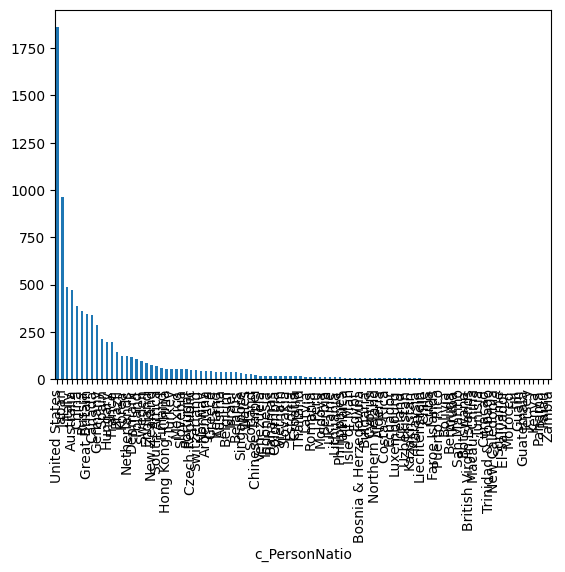

In [ ]:
## Shape of database
rows = len(df)
print(rows)
columns = len(df.columns)
print(columns)
df.info(verbose=True)
nullrows = df[df.isnull().any(axis=1)]
## create new dataframe where there are two conditions that must be true, 100m breasstroke and men 
breaststroke_men_100m = df.loc[(df['c_Event'] == '100m Breaststroke') & (df['c_Gender'] == 'Men')]
## in the new dataframe, find what is the id of the minimum value
fastest_row = breaststroke_men_100m['n_ResultSort'].idxmin()
fastestmalebreaststroke = breaststroke_men_100m['c_Person'][fastest_row]
print(fastestmalebreaststroke)

## create new dataframe of womens 200m individual medley
medley_women_200m = df.loc[(df['c_Event'] == '200m Individual Medley') & (df['c_Gender'] == 'Women')]
median_row = medley_women_200m.median()
median_row

female_only = df.loc[df['c_Gender'] == 'Women']
unique_nations = female_only['c_PersonNatio'].unique()
num_nations = (len(unique_nations))
print(num_nations)

female_only.value_counts('c_PersonNatio').plot(kind='bar')



In [ ]:
median_row

c_Season            2018.0
n_DateSort      20180701.0
n_ResultSort      137450.0
dtype: float64

In [ ]:
breaststroke_men_100m

,c_Sport,c_Season,c_Event,c_Gender,n_DateSort,c_Person,c_PersonNatio,c_NOC,c_Result,n_ResultSort,c_Class
981,Swimming,2018,100m Breaststroke,Men,20180804,Adam Peaty,England,Great Britain,57.10,57100,Elite
982,Swimming,2018,100m Breaststroke,Men,20180804,James Wilby,England,Great Britain,58.64,58640,Elite
983,Swimming,2018,100m Breaststroke,Men,20180616,Yasuhiro Koseki,Japan,Japan,58.78,58780,Elite
984,Swimming,2018,100m Breaststroke,Men,20180804,Anton Chupkov,Russia,Russia,59.06,59060,Elite
985,Swimming,2018,100m Breaststroke,Men,20180629,Arno Kamminga,Netherlands,Netherlands,59.14,59140,Elite
...,...,...,...,...,...,...,...,...,...,...,...
1463,Swimming,2018,100m Breaststroke,Men,20180522,Talel Mrabet,Tunisia,Tunisia,1:03.49,63490,Elite
1464,Swimming,2018,100m Breaststroke,Men,20180420,Ilya Nazarov,Russia,Russia,1:03.50,63500,Elite
1465,Swimming,2018,100m Breaststroke,Men,20180728,Ethan Dang,United States,United States,1:03.50,63500,Elite
1466,Swimming,2018,100m Breaststroke,Men,20180708,Tom Andersson,Sweden,Sweden,1:03.50,63500,Elite


In [ ]:
fastest_row

981

In [ ]:
nullrows

,c_Sport,c_Season,c_Event,c_Gender,n_DateSort,c_Person,c_PersonNatio,c_NOC,c_Result,n_ResultSort,c_Class
9743,Swimming,2018,4 x 100m Freestyle Relay,Men,20180809,NaN,NaN,Brazil,3:12.02,192020,Elite
9744,Swimming,2018,4 x 100m Freestyle Relay,Men,20180803,NaN,NaN,Russia,3:12.23,192230,Elite
9745,Swimming,2018,4 x 100m Freestyle Relay,Men,20180809,NaN,NaN,Australia,3:12.53,192530,Elite
9746,Swimming,2018,4 x 100m Freestyle Relay,Men,20180809,NaN,NaN,Japan,3:12.54,192540,Elite
9747,Swimming,2018,4 x 100m Freestyle Relay,Men,20180803,NaN,NaN,Italy,3:12.90,192900,Elite
...,...,...,...,...,...,...,...,...,...,...,...
10046,Swimming,2018,4 x 200m Freestyle Relay,Women,20180824,NaN,NaN,New Zealand,8:18.91,498910,Elite
10047,Swimming,2018,4 x 200m Freestyle Relay,Women,20180821,NaN,NaN,Indonesia,8:21.51,501510,Elite
10048,Swimming,2018,4 x 200m Freestyle Relay,Women,20180708,NaN,NaN,Portugal,8:24.56,504560,Elite
10049,Swimming,2018,4 x 200m Freestyle Relay,Women,20180708,NaN,NaN,Slovakia,8:27.47,507470,Elite


## Python Wrangling Challenge - Bonus

> Multiple File Handling

**Setup**

+ Create a separate excel file for each unique event within the data. **Hint:** Use the pandas [`groupby`]() function to group the dataset by event. Then [loop through the `groupby` object](https://stackoverflow.com/questions/21333832/how-to-save-pandas-groups-to-separate-files) to create and save each file into the `data` folder.

**Challenge**

+ Merge all the `.xlsx` files within the `data` folder into one dataframe.

In [ ]:
# Setup

In [ ]:
# Challenge

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=82522c04-b10e-4808-ba92-f37909eae5ea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>